In [14]:
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv("/home/enrique/Escritorio/Proyectos_Datasets/Ventas-002/data/ventas_descuentos.csv")

In [16]:
df.head()

,Fecha,Producto,Categoria,Ciudad,Cantidad,Precio,Descuento,Costo
0,2024-01-05,Notebook,Electrónica,Lima,2,3500,0.10,2800
1,2024-01-08,Mouse,Accesorios,Lima,5,50,0.00,30
2,2024-01-15,Teclado,Accesorios,Arequipa,3,120,0.05,80
3,2024-02-02,Monitor,Electrónica,Arequipa,1,1200,0.15,900
4,2024-02-10,Notebook,Electrónica,Lima,1,3600,0.05,2900


In [17]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fecha      9 non-null      str    
 1   Producto   9 non-null      str    
 2   Categoria  9 non-null      str    
 3   Ciudad     9 non-null      str    
 4   Cantidad   9 non-null      int64  
 5   Precio     9 non-null      int64  
 6   Descuento  9 non-null      float64
 7   Costo      9 non-null      int64  
dtypes: float64(1), int64(3), str(4)
memory usage: 708.0 bytes


In [18]:
df.isna().sum()


Fecha        0
Producto     0
Categoria    0
Ciudad       0
Cantidad     0
Precio       0
Descuento    0
Costo        0
dtype: int64

In [19]:
# Ingreso bruto
df["Ingreso_bruto"] = df["Cantidad"] * df["Precio"]

# Descuento aplicado en dinero
df["Descuento_aplicado"] = df["Ingreso_bruto"] * df["Descuento"]

# Ingreso neto
df["Ingreso_neto"] = df["Ingreso_bruto"] - df["Descuento_aplicado"]

# Costo total
df["Costo_total"] = df["Cantidad"] * df["Costo"]

# Ganancia
df["Ganancia"] = df["Ingreso_neto"] - df["Costo_total"]

# Margen de ganancia
df["Margen"] = df["Ganancia"] / df["Ingreso_neto"]


In [20]:
df[[
    "Producto",
    "Ingreso_bruto",
    "Descuento_aplicado",
    "Ingreso_neto",
    "Costo_total",
    "Ganancia",
    "Margen"
]]


,Producto,Ingreso_bruto,Descuento_aplicado,Ingreso_neto,Costo_total,Ganancia,Margen
0,Notebook,7000,700.0,6300.0,5600,700.0,0.111111
1,Mouse,250,0.0,250.0,150,100.0,0.400000
2,Teclado,360,18.0,342.0,240,102.0,0.298246
3,Monitor,1200,180.0,1020.0,900,120.0,0.117647
4,Notebook,3600,180.0,3420.0,2900,520.0,0.152047
5,Mouse,450,45.0,405.0,280,125.0,0.308642
6,Monitor,2300,0.0,2300.0,1800,500.0,0.217391
7,Notebook,3400,680.0,2720.0,2800,-80.0,-0.029412
8,Teclado,440,0.0,440.0,300,140.0,0.318182


In [21]:
# Analisis de rentabilidad
rentabilidad_producto = df.groupby("Producto")[[
    "Ingreso_neto",
    "Ganancia"
]].sum()

rentabilidad_producto["Margen_total"] = (
    rentabilidad_producto["Ganancia"] / rentabilidad_producto["Ingreso_neto"]
)

rentabilidad_producto


,Ingreso_neto,Ganancia,Margen_total
Producto,,,
Monitor,3320.0,620.0,0.186747
Mouse,655.0,225.0,0.343511
Notebook,12440.0,1140.0,0.091640
Teclado,782.0,242.0,0.309463


In [22]:
# Rentabilidad por ciudad
rentabilidad_ciudad = df.groupby("Ciudad")[[
    "Ingreso_neto",
    "Ganancia"
]].sum()

rentabilidad_ciudad["Margen_total"] = (
    rentabilidad_ciudad["Ganancia"] / rentabilidad_ciudad["Ingreso_neto"]
)

rentabilidad_ciudad


,Ingreso_neto,Ganancia,Margen_total
Ciudad,,,
Arequipa,1362.0,222.0,0.162996
Cusco,3125.0,45.0,0.014400
Lima,12710.0,1960.0,0.154209


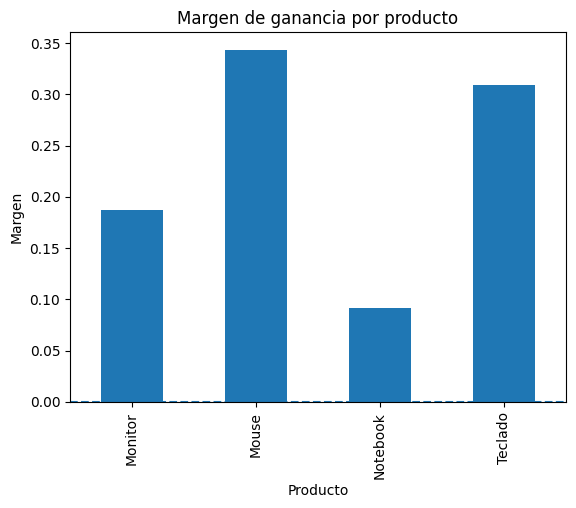

In [ ]:
# Gráfico de margen por producto
margen_producto = rentabilidad_producto["Margen_total"]

ax = margen_producto.plot(kind="bar")

ax.set_title("Margen de ganancia por producto")
ax.set_ylabel("Margen")

plt.axhline(0, linestyle="--")
plt.show()
plt.savefig("../output/margen_por_producto.png", dpi=120)
plt.close()


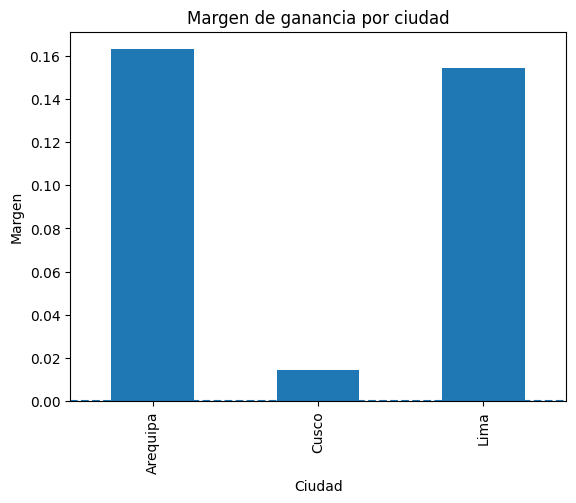

In [ ]:
# Gráfico de margen por ciudad
margen_ciudad = rentabilidad_ciudad["Margen_total"]

ax = margen_ciudad.plot(kind="bar")

ax.set_title("Margen de ganancia por ciudad")
ax.set_ylabel("Margen")

plt.axhline(0, linestyle="--")
plt.show()
plt.savefig("../output/rentabilidad_ciudad.png", dpi=120)
plt.close()
